In [438]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Original Dataset
- Link : https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants

# Data cleaning on Kaggle
- Link - https://www.kaggle.com/code/rajeevnayantripathi/data-cleaning-eda-on-zomato-bangalore-dataset

# Cleaned Dataset

In [439]:
df = pd.read_csv('/content/zomato_cleaned.csv')
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost2plates,type,location
0,Jalsa,Yes,Yes,4,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4,787,Casual Dining,others,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3,918,others,others,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3,166,Casual Dining,others,600,Buffet,Banashankari


In [440]:
df.shape

(51201, 10)

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51201 entries, 0 to 51200
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51201 non-null  object
 1   online_order  51201 non-null  object
 2   book_table    51201 non-null  object
 3   rate          51201 non-null  int64 
 4   votes         51201 non-null  int64 
 5   rest_type     51201 non-null  object
 6   cuisines      51201 non-null  object
 7   cost2plates   51201 non-null  int64 
 8   type          51201 non-null  object
 9   location      51201 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.9+ MB


##**Objective:**
- This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

##**Key Analysis Points:**

- The popularity of different cuisines in specific locations.
- The correlation between demographics and food preferences.
- The competition among restaurants in various categories.
- The needs and preferences of consumers in different neighborhoods.
- Location of the restaurant
- Approx Price of food
- Theme based restaurant or not
- Which locality of that city serves that cuisines with maximum number of restaurants
- Is a particular neighborhood famous for its own kind of food.
- #### Overall, the analysis aims to provide valuable insights for restaurant owners and investors to make informed decisions about opening new restaurants or expanding existing one


# Basic Feature Engineering

In [442]:
num_cuisines = df['cuisines'].str.split(',').str.len()
avg_cost_per_plate = round(df['cost2plates']/num_cuisines).astype('int')
df.insert(9,'avg_cost_per_plate',avg_cost_per_plate )

In [443]:
lower = df['rate'].quantile(0.25)
upper = df['rate'].quantile(0.75)

def categorize_rate(x):
  if x < lower:
    return 'low'
  elif lower<= x <=upper:
    return 'mid'
  else:
     return 'high'


rate_category = df['rate'].apply(categorize_rate)
df.insert(4,'rate_category',rate_category )

In [444]:
lower = df['votes'].quantile(0.25)
upper = df['votes'].quantile(0.75)

def categorize_vote(x):
  if x < lower:
    return 'low'
  elif lower<= x <=upper:
    return 'mid'
  else:
     return 'high'


vote_category = df['votes'].apply(categorize_vote)
df.insert(6,'vote_category',vote_category )

In [445]:
lower = df['avg_cost_per_plate'].quantile(0.25)
upper = df['avg_cost_per_plate'].quantile(0.75)

def categorize_avg_cost_per_plate(x):
  if x < lower:
    return 'low'
  elif lower<= x <=upper:
    return 'mid'
  else:
     return 'high'


cost_category = df['avg_cost_per_plate'].apply(categorize_avg_cost_per_plate)
df.insert(12,'cost_category',cost_category)

In [446]:
df.drop(columns = 'cost2plates',inplace= True)

In [447]:
df.shape

(51201, 13)

##Removing Extra Spaces

In [448]:
df['name'] = df['name'].str.strip()
df['online_order'] = df['online_order'].str.strip()
df['book_table'] = df['book_table'].str.strip()
df['rest_type'] = df['rest_type'].str.strip()
df['cuisines'] = df['cuisines'].str.strip()
df['type'] = df['type'].str.strip()
df['location'] = df['location'].str.strip()

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51201 entries, 0 to 51200
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                51201 non-null  object
 1   online_order        51201 non-null  object
 2   book_table          51201 non-null  object
 3   rate                51201 non-null  int64 
 4   rate_category       51201 non-null  object
 5   votes               51201 non-null  int64 
 6   vote_category       51201 non-null  object
 7   rest_type           51201 non-null  object
 8   cuisines            51201 non-null  object
 9   type                51201 non-null  object
 10  avg_cost_per_plate  51201 non-null  int64 
 11  cost_category       51201 non-null  object
 12  location            51201 non-null  object
dtypes: int64(3), object(10)
memory usage: 5.1+ MB


In [450]:
df.isnull().sum() # no missing values in data

name                  0
online_order          0
book_table            0
rate                  0
rate_category         0
votes                 0
vote_category         0
rest_type             0
cuisines              0
type                  0
avg_cost_per_plate    0
cost_category         0
location              0
dtype: int64

In [451]:
df.duplicated().sum() # no duplicate value in data

0

# Categorize Columns
## 1. Categorical - name, online_order, book_table,rate_category, vote_category, location, rest_type, cuisines, cost_cateory, type
## 2. Numerical - rate, votes, avg_cost_per_plate

#Univariate Analysis on Categorical Columns

In [452]:
df.head()

,name,online_order,book_table,rate,rate_category,votes,vote_category,rest_type,cuisines,type,avg_cost_per_plate,cost_category,location
0,Jalsa,Yes,Yes,4,high,775,high,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,267,mid,Banashankari
1,Spice Elephant,Yes,No,4,high,787,high,Casual Dining,others,Buffet,800,high,Banashankari
2,San Churro Cafe,Yes,No,3,mid,918,high,others,others,Buffet,800,high,Banashankari
3,Addhuri Udupi Bhojana,No,No,3,mid,88,mid,Quick Bites,"South Indian, North Indian",Buffet,150,low,Banashankari
4,Grand Village,No,No,3,mid,166,mid,Casual Dining,others,Buffet,600,mid,Banashankari


- **name:** This column contains the name of the restaurant.
- **online_order:** Indicates whether the restaurant accepts online orders.
- **book_table:** Indicates whether the restaurant allows booking tables.
- **rate:** Represents the rating of the restaurant.
- **rate_category:** Categorization of the rating, possibly based on ranges or thresholds.
- **votes:** Number of votes or reviews the restaurant has received.
- **vote_category:** Categorization of the number of votes.
- **location:** Location of the restaurant, such as a neighborhood or district.
- **rest_type:** Type of restaurant, such as "Casual Dining", "Quick Bites", etc.
- **cuisines:** Types of cuisines served at the restaurant.
- **avg_cost_per_plate:** Average cost per plate at the restaurant.
- **cost_category:** Categorization of the average cost per plate.
- **type:** Type of establishment, such as "Buffet", "Pubs and bars", etc.

## 1. name


In [453]:
temp = df['name'].value_counts().head(20).reset_index()
fig = px.bar(temp,x='name',y='count',color = 'name',hover_name = 'name',text_auto = True,
             title = 'Top 20 Most Popular Restaurants in Bangalore')
fig.update_layout(xaxis = dict(title ='restaurant'))
fig.show()

##2. online_order
- 59% restaurants provides -> online order facility
- 41% restaurants didn't provides -> online order facility
- Modern lifestyles favor convenience, prompting a shift towards online food ordering. Factors like traffic congestion and long work hours make dining out less feasible.
- Online ordering and delivery services offer a solution by providing restaurant-quality meals at home.
- To stay competitive, the majority of restaurants now offer online ordering facilities.
This trend reflects an adaptation to changing consumer behaviors and preferences.


In [454]:
temp = df['online_order'].value_counts().reset_index()
fig = px.pie(temp,values = 'count',names ='online_order',hover_name = 'online_order',hole  = 0.5 ,
             title = 'Restaurants providing Online/Offline Facility')
fig.show()


## 3. book_table

- Majority (87.5%) of restaurants do not offer table booking facilities.
- A small percentage (12.5%) of restaurants provide table booking options.
- This suggests varying levels of demand for reservation services among customers.

In [455]:
temp = df['book_table'].value_counts().reset_index()
fig = px.pie(temp,values='count',names='book_table',hole = 0.5,hover_name = 'book_table',title = 'Book Table Facility Distribution')
fig.show()

## 4. location
- BTM is the most crowded location for opening new restaurant.
- The suitable place for opening restaurant should be in less crowded place.

In [456]:
temp = df['location'].value_counts().reset_index()
temp.drop(index = temp[temp['location']=='others'].index,inplace = True)
temp = temp.reset_index(drop=True)
fig = px.bar(temp,x = 'location',y='count',color = 'location',title = 'Top Crowded Restaurants Location in Banglore')
fig.show()


## 5. rest_type
- Quick Bites and Casual Dining are top two restaurant type

In [457]:
temp = df['rest_type'].value_counts().reset_index()
temp.drop(index = temp[temp['rest_type']=='others'].index,inplace = True)
temp = temp.reset_index(drop = True)
fig = px.bar(temp,x ='rest_type',y='count',color='rest_type',text_auto = True,title = ' Top Restaurant types')
fig.show()

## 6. cuisines
- North Indian cuisine dominates the menu offerings of restaurants in Bangalore.
- Considering this trend, including North Indian food in your restaurant's menu is advisable if you're opening a new establishment.

In [458]:
temp = df['cuisines'].value_counts().head(20).reset_index()
temp.drop(index = temp[temp['cuisines']=='others'].index,inplace = True)
temp = temp.reset_index(drop = True)
temp

,cuisines,count
0,North Indian,2877
1,"North Indian, Chinese",2355
2,South Indian,1822
3,"Bakery, Desserts",906
4,Biryani,906
5,Fast Food,798
6,Desserts,751
7,Cafe,737
8,"South Indian, North Indian, Chinese",724
9,Bakery,649


## 7. type
- (25k) are listed in Delivery Category than comes Dine-out(17k) as so on

In [459]:
temp = df['type'].value_counts().reset_index()
fig = px.bar(temp,x = 'type',y='count',color ='type',text_auto = True,title = 'Restaurants Listed Type Frequency')
fig.show()

#Univarite Analysis on Numerical Columns

##1. rate
- min rating : 1/5
- avg. rating : 3.19/5
- max. rating : 4/5
- majority of restaurants have rating 3 then comes 4
- outlier is there but valid
- Bi-modal distribution
- no skewness

In [460]:
df['rate'].describe()

count    51201.000000
mean         3.197418
std          0.495497
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: rate, dtype: float64

In [461]:
fig= px.histogram(df,'rate',text_auto = True,nbins = 10)
fig.show()

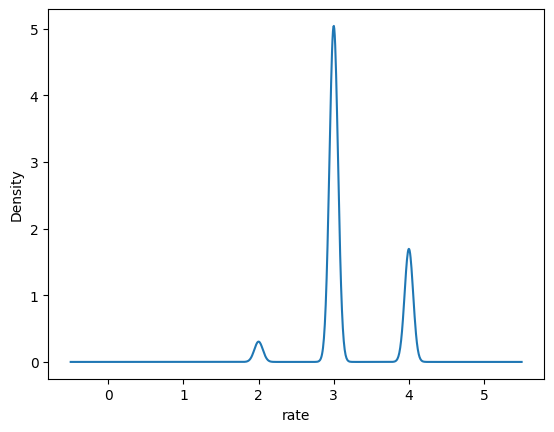

In [462]:
fig = df['rate'].plot(kind = 'kde')
plt.xlabel('rate')
plt.show()

In [463]:
fig = px.box(df,x='rate',color_discrete_sequence=['green']) # outliers
fig.show()

In [464]:
df[df['rate']==1] # valid outliers

,name,online_order,book_table,rate,rate_category,votes,vote_category,rest_type,cuisines,type,avg_cost_per_plate,cost_category,location
6250,Alibi - Maya International Hotel,No,No,1,low,224,high,Casual Dining,others,Dine-out,1200,high,Brigade Road
12394,Alibi - Maya International Hotel,No,No,1,low,224,high,Casual Dining,others,Dine-out,1200,high,Church Street
38480,Alibi - Maya International Hotel,No,No,1,low,225,high,Casual Dining,others,Dine-out,1200,high,Lavelle Road
43062,Alibi - Maya International Hotel,No,No,1,low,225,high,Casual Dining,others,Dine-out,1200,high,MG Road
47920,Alibi - Maya International Hotel,No,No,1,low,225,high,Casual Dining,others,Dine-out,1200,high,Residency Road


In [465]:
df['rate'].skew()

0.3595018946549954

##rate_category
- 4.33% are Low Rated Restaurants
- 71.6% are Mid Rated Restaurants
- 24.1% are High Rated Restaurants

In [466]:
temp = df['rate_category'].value_counts().reset_index()
fig = px.pie(temp,values='count',names = 'rate_category',title='Restaurant Rating Distribution',hole = 0.5)
fig.show()

##2. votes
- min : 0 votes
- mean : 285 votes
- max : 16832 votes
- Majority of restaurants have votes b/w 0-999
- Higly skewed
- Outliers are there but they are valid


In [467]:
df['votes'].describe()

count    51201.000000
mean       284.668268
std        806.049188
min          0.000000
25%          7.000000
50%         41.000000
75%        199.000000
max      16832.000000
Name: votes, dtype: float64

In [468]:
fig = px.histogram(df,x= 'votes',nbins = 30,text_auto = True)
fig.show()

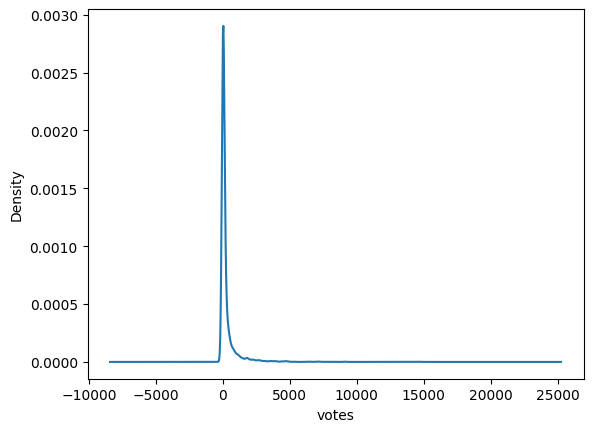

In [469]:
fig = df['votes'].plot(kind= 'kde')
plt.xlabel('votes')
plt.show()

In [470]:
df['votes'].skew()

7.541897414393302

In [471]:
fig = px.box(df,x='votes',color_discrete_sequence=['green']) # outliers
fig.show()

In [472]:
df[df['votes']>556].shape[0] # valid outliers

6169

## vote_category
- 50.3 % -> Mid voted restaurant
- 25% -> High voted restaurant
- 24.7% -> Low voted restaurants

In [473]:
temp = df['vote_category'].value_counts().reset_index()
fig = px.pie(temp,values='count',names = 'vote_category',title='Restaurant Voting Distribution',hole = 0.5)
fig.show()

##3. avg_cost_per_plate
- min : 13
- mean : 491
- max : 6000
- Mostly restaurants have avg plate cost b/w 200-399
- Highlt skewed
- outliers are there but valid

In [474]:
df['avg_cost_per_plate'].describe()

count    51201.000000
mean       491.263784
std        450.479053
min         13.000000
25%        200.000000
50%        350.000000
75%        600.000000
max       6000.000000
Name: avg_cost_per_plate, dtype: float64

In [475]:
fig = px.histogram(df,x='avg_cost_per_plate',nbins = 40,text_auto = True)
fig.show()

In [476]:
df['avg_cost_per_plate'].skew()

2.553542378860095

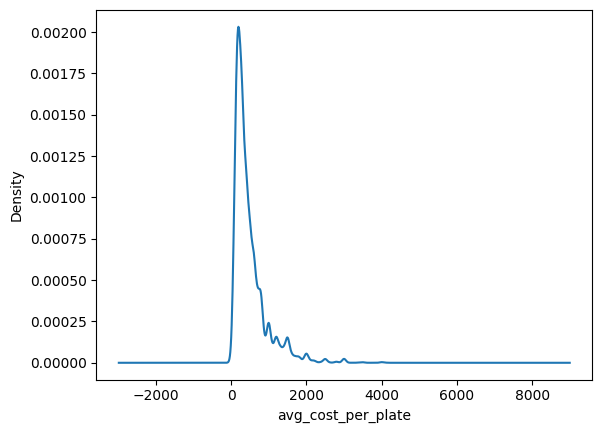

In [477]:
fig = df['avg_cost_per_plate'].plot(kind = 'kde')
plt.xlabel('avg_cost_per_plate')
plt.show()

In [478]:
fig = px.box(df,x='avg_cost_per_plate',color_discrete_sequence=['green']) # outliers
fig.show()

In [479]:
df[df['avg_cost_per_plate']>=1250].shape[0] # valid ouliers

3556

## cost_cateogory
- 58.2% of restaurants comes under Mid cost Category.
- 22.9% restaurants comes under High cost Category.
- 18.9% restaurants comes under Low cost Category.

In [480]:
temp = df['cost_category'].value_counts().reset_index()
fig = px.pie(temp,values='count',names = 'cost_category',hover_name = 'cost_category',title='Pricing Distribution',hole = 0.5)
fig.show()

#Insights for Opening a New Restaurant

#Online Ordering and Table Booking facilities for optimal customer engagement

- This title underscores the importance of incorporating both online ordering and table booking facilities for enhancing customer engagement and provides valuable insights for prospective restaurant owners aiming to open a new establishment.

##1. online_order vs location
- Restaurants in locality of **(Church Street ,Electronic City, Lavelle Road, MG Road, Residency Road)** has less number of online ordering restaurants.
- This statement simply explains that there are fewer restaurants offering online ordering services in the mentioned areas.
- Recognizing areas with lower availability of online ordering restaurants highlights potential market gaps

In [481]:
indexing = df[df['location'].str.contains('others')].index
temp= df.copy()
temp.drop(index = indexing,inplace = True)
temp_df = pd.crosstab(temp['location'],temp['online_order'])
fig = px.bar(temp_df,x=temp_df.index,y=temp_df.columns,barmode='group',title = 'Online/Offline Orders vs Location')
fig.show()

##3. online_order vs (rate, votes, avg_cost_per_plate)
- **Rate:** Restaurants offering online orders (Yes) have a slightly higher average rating (3.23) compared to those without online orders (No) with a rating of 3.15.

- **Votes:** Restaurants with online orders (Yes) receive more votes on average (307.92) compared to those without (No) with an average of 251.20 votes.

- **Avg_cost_per_plate:** Restaurants with online orders (Yes) have a lower average cost per plate (₹462.10) compared to those without (No) with an average cost per plate of ₹533.25.

From this data:

- **Moderate Rate Improvement:** Restaurants offering online orders tend to have a slightly higher average rating compared to those without, though the difference is not substantial.
 - There is no significant difference in the avg. rating of restaurants that offer online ordering compared to those that don't.
 - The overall rating of a restaurant mostly depends on two things:
   - the quality of the food
   - the service provided.
 - Customers rate a restaurant based on how good the food tastes and looks, and how well they were treated by the staff.
 - While online ordering can be convenient, it doesn't really affect these important factors that shape the overall rating. So, while it's handy, it's not the main thing customers consider when rating a restaurant.

- **Increased Votes:** There's a noticeable difference in the number of votes between restaurants with and without online orders. Restaurants offering online orders receive more votes on average, suggesting that this service may attract more attention and engagement from customers.

- **Lower Average Cost per Plate:** Interestingly, restaurants offering online orders have a lower average cost per plate compared to those without.
 - This suggests that there may be cost-saving benefits associated with online ordering.
 - This data underscores the **importance of optimizing online ordering** systems to enhance customer experience and capitalize on potential savings.
 - Businesses may want to consider **promoting and incentivizing** online ordering to potentially reduce costs and attract more customers.
 - This might indicate that restaurants cater to a broader demographic, including customers who are more price-conscious and prefer the convenience of ordering online.



In [482]:
temp = (df.groupby('online_order').agg({'rate':'mean','votes':'mean','avg_cost_per_plate':'mean'})).round(2)
temp

,rate,votes,avg_cost_per_plate
online_order,,,
No,3.15,251.20,533.25
Yes,3.23,307.92,462.10


##4. book_table vs (rate,votes,  avg_cost_per_plate)

**Rate:** Restaurants with table booking (Yes) have a higher average rating (3.76) compared to those without (No) with a rating of 3.12.

**Votes:** There's a slightly higher number of votes for restaurants with table booking (7,355,716) compared to those without (7,219,584).

**Avg_cost_per_plate:** Restaurants with table booking (Yes) have a significantly higher average cost per plate (₹1215.30) compared to those without (No) with an average cost per plate of ₹387.54.

Based on this data:

- **Better Service:** The higher average rating for restaurants with table booking services suggests that they may indeed provide better service, leading to increased customer satisfaction.

- **Comparable Votes:** While there is a slight difference in the number of votes between restaurants with and without table booking, it's not a substantial difference, suggesting that the presence of table booking might not significantly influence the number of votes a restaurant receives.

- **Wealthier Crowd:** The significantly higher average cost per plate for restaurants with table booking services implies that they may cater to a wealthier clientele who are willing to spend more on dining experiences.






In conclusion, offering table booking services appears to correlate with higher ratings and potentially catering to a wealthier clientele, although the impact on the number of votes may be less pronounced. This indicates that table booking services can contribute positively to a restaurant's reputation and possibly its profitability.








In [483]:
temp = (df.groupby('book_table').agg({'rate':'mean','votes':'sum','avg_cost_per_plate':'mean'})).round(2)
temp


,rate,votes,avg_cost_per_plate
book_table,,,
No,3.12,7219584,387.54
Yes,3.76,7355716,1215.30


##5. online_order vs rest_type
- Based on the data, it's evident that **Quick Bites and Casual Dining** are the most common types of restaurants, both for those offering online ordering and those not offering it.
- This indicates that Quick Bites and Casual Dining establishments are popular choices for customers, whether they prefer to order online or offline.
- The distribution of restaurant types between online and offline ordering categories is quite similar. This suggests that the availability of online ordering doesn't significantly alter the distribution of restaurant types.
- Despite the prevalence of Quick Bites and Casual Dining, there might be opportunities for other types of restaurants, such as **Cafes or Dessert Parlors, to explore and potentially expand their online ordering services** to cater to changing consumer preferences.

In [484]:
indexing = df[df['rest_type'].str.contains('others')].index
temp= df.copy()
temp.drop(index = indexing,inplace = True)
temp_df = ((pd.crosstab(temp['online_order'],temp['rest_type'],normalize = 'index'))*100).round()


fig = px.imshow(temp_df,text_auto = True,color_continuous_scale = 'viridis',title = 'Comparison of Online and Offline Ordering by Restaurant Type')
fig.show()


# Cuisine: Tailoring Menu Offerings to Local Tastes for New Restaurant Ventures

- This title highlights the importance of understanding popular cuisines in the area for guiding menu planning and catering to local preferences, which is essential for prospective restaurant ventures

##1. cuisines vs online_order
- **North Indian, South Indian, and Chinese** cuisines emerge as the most commonly ordered or favored cuisines, whether through online or offline orders in Bangalore.

- These popular cuisines maintain their dominance regardless of whether the orders are placed online or offline. This suggests that customer preferences for these cuisines remain consistent across different ordering methods.

- Understanding the popularity of specific cuisines across different ordering channels can guide restaurants in adapting their menus and services to meet the demands of the market effectively.


In [485]:
indexing = df[df['cuisines'].str.contains('others')].index
temp= df.copy()
temp.drop(index = indexing,inplace = True)
temp_df = ((pd.crosstab(temp['online_order'],temp['cuisines'],normalize = 'index')*100).round())

fig = px.imshow(temp_df, color_continuous_scale = 'viridis',
                title = 'Percentage Distribution of Restaurant Cuisines by Online/Offline Ordering Preference"')
fig.show()

##2. cuisines vs book_table
- The data indicates that regardless of whether restaurants offer table booking facilities or not, **North Indian, South Indian, and Chinese cuisines** are consistently favored or commonly ordered.

- This suggests that the availability of table booking facilities doesn't significantly influence the popularity of these cuisines.

- Therefore, restaurants specializing in these cuisines may focus on other aspects of their operations besides table booking to attract and retain customers.

- However, a helpful tip for new restaurants is to consider offering these cuisines if they plan to provide table booking. This strategy can attract more customers and make the restaurant more competitive.



In [486]:
temp = df.copy()
indexing = df[df['cuisines'].str.contains('others')].index
temp.drop(index=indexing, inplace=True)
temp_df = (pd.crosstab(temp['book_table'],temp['cuisines'],normalize = 'index')*100).round()

fig = px.imshow(temp_df,color_continuous_scale = 'jet',
                title = 'Percentage Distribution of Restaurant Cuisines by Table Booking Availability')
fig.show()


##3. cuisines vs location

In [487]:
# Calculate less crowded and more crowded places
temp = df['location'].value_counts().reset_index()
temp.drop(index=1, inplace=True)
temp = temp.reset_index(drop=True)

less_crowded = temp[temp['count'] <= temp['count'].quantile(0.5)]['location'].tolist()
more_crowded = temp[temp['count'] > temp['count'].quantile(0.5)]['location'].tolist()

# Filter data for less crowded and more crowded places
temp1 = df[df['location'].isin(less_crowded)]
temp2 = df[df['location'].isin(more_crowded)]

# Remove 'others' from cuisines
indexing1 = temp1[temp1['cuisines'].str.contains('others')].index
indexing2 = temp2[temp2['cuisines'].str.contains('others')].index

temp1.drop(index=indexing1, inplace=True)
temp2.drop(index=indexing2, inplace=True)

# Calculate cross-tabulation for both subsets
temp_df1 = pd.crosstab(temp1['location'], temp1['cuisines'])
temp_df2 = pd.crosstab(temp2['location'], temp2['cuisines'])

fig = px.imshow(temp_df1,color_continuous_scale='viridis')
fig.update_layout(title='Less Crowded Places and Preferred Cuisines')
fig.show()

fig = px.imshow(temp_df2,color_continuous_scale='viridis')
fig.update_layout(title='More Crowded Places and Preferred Cuisines')
fig.show()

<ipython-input-487-394fd16ae8b5>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-487-394fd16ae8b5>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##4. cuisines vs rest_type

In [488]:
temp = df.copy()
indexing = df[df['cuisines'].str.contains('others') | df['rest_type'].str.contains('others')].index
temp.drop(index=indexing, inplace=True)
temp_df = (pd.crosstab(temp['rest_type'],temp['cuisines'],normalize ='columns')*100).round()

fig = px.imshow(temp_df,color_continuous_scale = 'jet',height = 500, title = 'Distribution of Cuisines by Restaurant Type')
fig.update_layout(width=1100,height = 600)
fig.show()

##5. cuisines vs  avg_cost_per_plate

In [489]:
temp = (df.drop_duplicates().groupby('cuisines')['avg_cost_per_plate'].mean()).round(2).sort_values(ascending = False).reset_index()
temp.drop(index =temp[temp['cuisines']=='others'].index,inplace=True)
fig = px.bar(temp,x='cuisines',y='avg_cost_per_plate',color='cuisines',text_auto = True,hover_name = 'avg_cost_per_plate',
             title = 'Average Cost per plate for different Cusines')
fig.update_layout(height = 700,width = 1400)
fig.show()

##6. cuisines vs cost_category

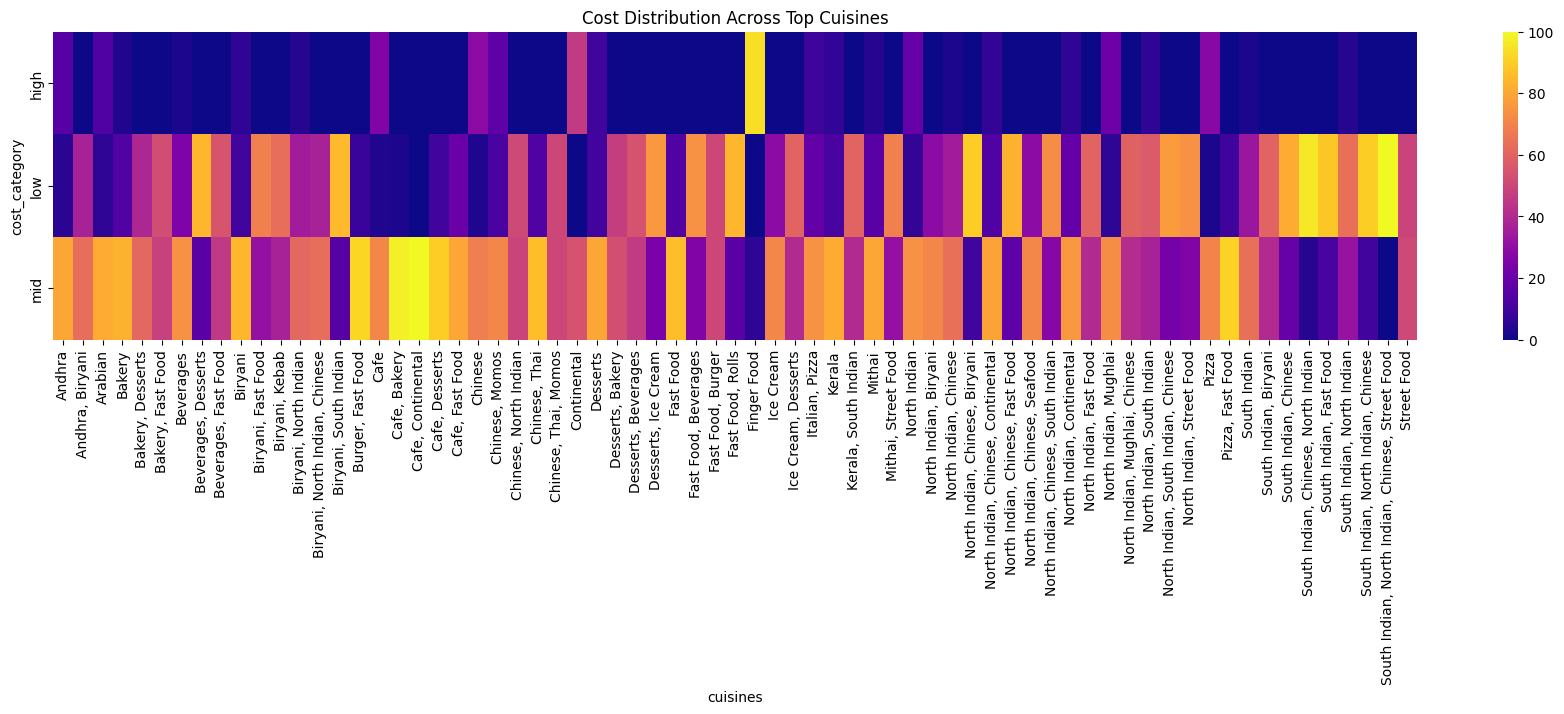

In [490]:
temp = df.copy()
indexing = df[df['cuisines'].str.contains('others')].index
temp.drop(index=indexing, inplace=True)

temp_df = (pd.crosstab(temp['cost_category'],temp['cuisines'],normalize = 'columns')*100).round()
plt.figure(figsize = (22,4))
fig = sns.heatmap(data = temp_df,cmap = 'plasma')
plt.title('Cost Distribution Across Top Cuisines')
plt.show()

##7. cuisines vs votes

In [491]:
temp = df.copy()
indexing = df[df['cuisines'].str.contains('others')].index
temp.drop(index=indexing, inplace=True)
temp.drop_duplicates(inplace = True)
temp_df = temp.groupby('cuisines')['votes'].mean().sort_values(ascending = False).reset_index().head()
fig = px.bar(temp_df,x='cuisines',y='votes',color='cuisines',text_auto = True,title = 'Top 5 cuisines based on average voting')
fig.show()

##8. cuisines vs rates

In [492]:
temp = df.copy()
indexing = df[df['cuisines'].str.contains('others')].index
temp.drop(index=indexing, inplace=True)
temp.drop_duplicates(inplace = True)

temp_df = (temp.groupby('cuisines')['rate'].mean().sort_values(ascending = False).reset_index()).round(2).head()
fig = px.bar(temp_df,x='cuisines',y='rate',color='cuisines',text_auto = True,title = 'Top 5 cuisines based on average rating')
fig.show()

##9. cuisines vs (rate_category ,vote_category)
- Restaurants serving **North Indian and Chinese** cuisines are the most popular choices among customers, in different rate and vote_category.
- This indicates that diners highly appreciate these cuisines. Such restaurants have a great opportunity to attract more customers and become preferred dining spots.

In [493]:
temp = df.copy()
indexing = df[df['cuisines'].str.contains('others')].index
temp.drop(index=indexing, inplace=True)

temp_df1 = pd.crosstab(temp['rate_category'], temp['cuisines'])
temp_df2 = pd.crosstab(temp['vote_category'], temp['cuisines'])

# Create subplots

fig1 = px.imshow(temp_df1)
fig1.update_layout(width=1000,height = 600)
fig1.show()


fig2 = px.imshow(temp_df2)

fig2.update_layout(width=1000,height = 600)
fig2.show()

# fig = make_subplots(rows=2, cols=1, subplot_titles=("Rate Category vs. Cuisine", "Vote Category vs. Cuisine"),shared_xaxes = True)

# fig.add_trace(go.Heatmap(x=temp_df1.columns, y=temp_df1.index, z=temp_df1.values, colorscale='viridis'), row=1, col=1)

# fig.add_trace(go.Heatmap(x=temp_df2.columns, y=temp_df2.index, z=temp_df2.values, colorscale='viridis'), row=2, col=1)




#Rating and Votes: Harnessing Customer Feedback for Restaurant Success

- This title emphasizes the significance of high ratings and a large number of votes in indicating customer satisfaction and popularity. It underscores how leveraging customer feedback can offer valuable insights into a restaurant's potential success

##1. rate vs (votes, avg_cost_per_plate)
- As restaurants rating increases , number of votes also increases.
- As restaurants rating increases , avg. cost per plate also increases

In [494]:
fig = px.scatter(df,x='votes',y='rate',color='votes',title = ' Restaurant Rating vs Votes',color_continuous_scale='plasma')
fig.show()


In [495]:
fig = px.scatter(df,x='avg_cost_per_plate',y='rate',color='votes',title = ' Restaurant Rating vs Avg. cost per plate')
fig.show()

##3. vote_category vs rest_type

In [496]:
temp = pd.crosstab(df['vote_category'],df['rest_type'])
fig = px.bar(temp, x= temp.index, y = temp.columns , barmode = 'group',title = 'Vote Category vs Restaurant type')
fig.show()

##3. rate_category vs (cost_category, vote_category)
- Lower-rated restaurants falls in **(mid-cost & mid-voted)** category.
- Mid-rated ones falls in  **(mid-cost & mid-voted)** category.
- Higher-rated ones falls in  **(high-cost & high-voted)** category.
- This indicates that higher-rated establishments generally command higher costs and attract more votes from customers, suggesting a positive relationship between perceived quality, pricing, and popularity.

In [497]:
temp = pd.crosstab(df['rate_category'],df['cost_category'])
temp

cost_category,high,low,mid
rate_category,,,
high,6697,836,4799
low,426,327,1466
mid,4607,8494,23549


In [498]:
temp = pd.crosstab(df['rate_category'],df['vote_category'])
temp

vote_category,high,low,mid
rate_category,,,
high,8797,3,3532
low,409,35,1775
mid,3579,12601,20470


##4. vote_category vs cost_category

- Restaurants that comes under low vote_category comes under mid cost category.
 -  Restaurants with a low vote category typically fall within the mid-cost category, suggesting that they may not be as popular among customers and consequently offer more affordable options.

- Restaurants that comes under mid vote_category also comes under mid cost category.
 - It indicating a moderate level of popularity and pricing.

- Restaurants that comes under high vote_category also comes under high cost category.
 - Restaurants with a high vote category tend to align with the high-cost category, indicating that they command higher prices and likely offer more popular dining experiences.

- This suggests a correlation between the popularity of restaurants, reflected by vote category, and their pricing strategies, as reflected by cost category.

In [499]:
temp = pd.crosstab(df['vote_category'],df['cost_category'])
temp

cost_category,high,low,mid
vote_category,,,
high,7006,648,5131
low,683,3841,8115
mid,4041,5168,16568


#Strategic Location Analysis: Enhancing New Restaurant Success through Data-Driven Insights

- This title emphasizes the importance of choosing the right location for a new restaurant and highlights how analyzing location data can provide valuable insights into factors such as foot traffic, proximity to residential or commercial areas, and potential competitors

##1. location vs book_table
- The visualization highlights variations in the availability of table booking facilities across different locations.
- Certain locations show a higher concentration of restaurants offering table booking, indicating potentially higher demand or preference for this service.
- Conversely, some locations have fewer restaurants with table booking facilities, suggesting potential opportunities for new openings to cater to this demand.
- New restaurants aiming to provide table booking services may benefit from targeting locations where such facilities are less prevalent, thus filling a gap in the market and potentially attracting more customers.
- Understanding the distribution of table booking facilities across
 various locations can inform strategic decisions for restaurant owners and investors looking to optimize their offerings and target specific demographics.

In [500]:
indexing = df[df['location'].str.contains('others')].index
temp= df.copy()
temp.drop(index = indexing,inplace = True)
temp_df = pd.crosstab(temp['location'],temp['book_table'])
fig = px.bar(temp_df, x=temp_df.index, y=temp_df.columns, barmode='group',
             title = 'Presence of Table Booking Facilities Across Different Locations')
fig.show()


##2. location vs avg_cost_per_plate
- The visualization displays the average cost per plate across various locations.
- It appears that certain locations tend to have higher average costs per plate compared to others.
- **Church Street tops the list with the highest average cost per plate at ₹711.**
- **This is followed by Brigade Road at ₹702 , MG Road at ₹700.**
- **Banashankri has the lowest average cost per plate at ₹336.**
- Understanding these variations can be useful for both customers and restaurant owners.
- Customers can plan their dining budgets accordingly based on the average costs in different locations.
- For restaurant owners, this information can guide pricing strategies, especially when considering opening new establishments or adjusting menu prices in existing ones.
- Additionally, it underscores the importance of considering location-specific factors when analyzing cost dynamics in the restaurant industry.

In [501]:
temp = (df.groupby('location')['avg_cost_per_plate'].mean()).round().sort_values(ascending = False).reset_index()
fig = px.bar(temp,x='location',y='avg_cost_per_plate',color='location',text_auto = True, hover_name = 'avg_cost_per_plate',
title = 'Average cost per plate on different Locations')
fig.show()

##3. location vs cost_category

- It provides insights into the affordability and pricing diversity of dining options in various areas.
- Some locations may have a higher concentration of restaurants falling into specific cost categories, indicating potential dining preferences or economic demographics.
- Understanding these patterns can help customers make informed decisions about where to dine based on their budget and desired dining experience.
- For restaurant owners and investors, this data can inform strategic decisions regarding pricing strategies, menu offerings, and location selection to cater to the preferences and affordability levels of the target market in each location.

In [502]:
indexing = df[df['location'].str.contains('others')].index
temp= df.copy()
temp.drop(index = indexing,inplace = True)

temp_df= pd.crosstab(temp['location'],temp['cost_category'])
fig = px.bar(temp_df,x=temp_df.index,y=temp_df.columns,
             title = 'Distribution of Cost Categories Among Restaurants Across Locations')
fig.show()


##6. location vs (votes,rates)

- Certain locations may have a higher average number of votes, indicating greater customer engagement and potentially higher levels of patronage.
- This suggests that some areas may be more popular dining destinations or have a higher density of restaurants attracting more attention from customers.
- Understanding the distribution of votes across locations can help customers in choosing dining destinations and assist restaurant owners in evaluating the performance of their establishments relative to competitors in the same area.
- Additionally, this information can inform marketing strategies, location-based promotions, and business expansion plans for restaurant owners.

- **Targeted Marketing:** Owners can tailor marketing efforts based on the popularity of their restaurant's location. If the area has a high average number of votes, they can leverage this popularity in advertising campaigns to attract more customers.

- **Expansion Opportunities:** Analyzing locations with high levels of customer engagement can inform decisions about where to open new branches or expand existing ones. Areas with a strong track record of votes may present good opportunities for business growth.

In [503]:
temp = (df.groupby('location')['votes'].mean()).round(2).sort_values(ascending = False).reset_index()
temp.drop(index =temp[temp['location']=='others'].index,inplace=True)
fig = px.bar(temp,x='location',y='votes',color='location',text_auto = True, hover_name = 'location',
             title = 'Average Restaurant Voting on Different Location')
fig.show()

temp = (df.groupby('location')['rate'].mean()).round(2).sort_values(ascending = False).reset_index()
temp.drop(index =temp[temp['location']=='others'].index,inplace=True)
fig = px.bar(temp,x='location',y='rate',color='location',text_auto = True, hover_name = 'location',
             title = 'Average Restaurant Rating on Different Location')
fig.show()

##5. location vs rate_category
- The analysis reveals the distribution of rate categories across various locations.
- Certain locations may have a higher concentration of restaurants falling into specific rate categories.
- This suggests that the perceived quality of restaurants, as reflected by their rate categories, may vary depending on the location.
- Understanding these variations can assist stakeholders, such as customers and restaurant owners, in making informed decisions regarding dining choices, business strategies, and location-based marketing efforts

In [504]:
indexing = df[df['location'].str.contains('others')].index
temp= df.copy()
temp.drop(index = indexing,inplace = True)
temp_df = pd.crosstab(temp['location'],temp['rate_category'])
temp_df

fig = px.bar(temp_df,x=temp_df.index, y=temp_df.columns,title = 'Location vs Rating Category of Restaurants')
fig.show()


##7. location vs vote_category
- Which location of restaurants get the most votes , medium votes and low number of votes.

In [505]:
indexing = df[df['location'].str.contains('others')].index
temp= df.copy()
temp.drop(index = indexing,inplace = True)
temp_df = pd.crosstab(temp['location'],temp['vote_category'])
fig = px.bar(temp_df,x=temp_df.index, y=temp_df.columns,barmode='group',title = 'Location vs Voting Category of Restaurants')
fig.show()

In [506]:
df1 = df.copy()
temp = (df.groupby('location')['votes'].sum()).sort_values(ascending = False).reset_index()
temp[temp['location']=='others'].index
temp.drop(index =temp[temp['location']=='others'].index,inplace=True)
fig = px.bar(temp,x='location',y='votes',color='location',text_auto = True,
             title = 'In which location people are more interested in voting')
fig.show()

In [507]:
temp = (pd.crosstab(df['type'],df['location'],normalize = 'index')*100).round()
fig = px.imshow(temp,title ='Location-wise Distribution of Restaurant types',color_continuous_scale = 'viridis',)
fig.show()

##8. location vs rest_type

In [508]:
temp = pd.crosstab(df['rest_type'],df['location'])
fig = px.imshow(temp,title ='Location-wise Distribution of Restaurant types', color_continuous_scale='cividis')
fig.update_layout(yaxis = dict(title = 'restaurant type'))
fig.show()

#Type of Restaurant (Rest Type):
- The type of restaurant (e.g., Casual Dining, Quick Bites) can influence the ambiance, menu offerings, and target audience.



##1. rest_type vs avg_cost_per_plate
- The analysis provides insights into the average cost per plate across different restaurant types.
- Casual Dining with a Bar has the highest average cost per plate, followed by Casual Dining and Cafe.
- Quick Bites and Bakery establishments have relatively lower average costs per plate.
- Understanding these variations can assist both customers and restaurant owners in making informed decisions.

- **Pricing Strategies:** Owners can adjust their pricing strategies based on the average cost per plate within their restaurant type category. For example, if they operate a Casual Dining establishment, they may consider setting prices in line with the average cost per plate for Casual Dining restaurants.

- **Menu Planning:** Understanding the average cost per plate for different restaurant types can guide menu planning. Owners can optimize their menu offerings to align with customer expectations and pricing norms within their restaurant category.


In [509]:
temp = (df.groupby('rest_type')['avg_cost_per_plate'].mean()).round().sort_values(ascending = False).reset_index()
temp[temp['rest_type']=='others'].index
temp.drop(index =temp[temp['rest_type']=='others'].index,inplace=True)

fig = px.bar(temp,x='rest_type',y='avg_cost_per_plate',color='rest_type',text_auto = True,
             title = 'Average cost per plate on different Restaurant type')
fig.show()

##2. rest_type vs rate

In [510]:
temp = (df.groupby('rest_type')['rate'].mean()).round(2).sort_values(ascending = False).reset_index()
temp.drop(index =temp[temp['rest_type']=='others'].index,inplace=True)
fig = px.bar(temp,x='rest_type',y='rate',color='rest_type',text_auto = True,title = 'Average Rating of different Restaurant type')
fig.show()

##3. rest_type vs votes

In [511]:
temp = (df.groupby('rest_type')['votes'].mean()).round(2).sort_values(ascending = False).reset_index()
temp.drop(index =temp[temp['rest_type']=='others'].index,inplace=True)
fig = px.bar(temp,x='rest_type',y='votes',color='rest_type',text_auto = True,title = 'Average Voting of different Restaurant type')
fig.show()